##### import necessary libraries

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import os
import sys
import random
# to remove the limitation on the number of columns that can be displayed
pd.set_option('display.max_columns', None)

##### read dataset

In [2]:
data = pd.read_csv(r"E:\github\fanap\flights.csv")
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


##### Data information

In [3]:
# summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

**number of columns:**   
21  
**number of rows:**  
336776

**these columns have missing values:**  
dep_time, dep_delay, arr_delay, arr_time, tailnum, air_time

**columns data types:**  
float64(5), int64(10), object(6)

##### statistics summary for numerical variables  
in this section we analyse numerical variables  
note: id and flight it has no statistical meaning and they must convert to str  

**year:**  
All records belong to the year 2013, so this field does not vary within the data.  

**month, day, hour, minute:**  
These fields represent the scheduled departure date and time of the flights.  

**dep_time and sched_dep_time:**  
Dep_Time shows the actual departure time of the flights, while Sched_Dep_Time represents the originally planned departure time. Both are represented in the 24-hour format.  

**arr_Time and sched_arr_time:**  
Similar to dep_time and sched_dep_time, Arr_Time displays the actual arrival time, whereas Sched_Arr_Time indicates the initially scheduled arrival time. Again, both are expressed using the 24-hour format.  

**dep_Delay and arr_delay:**  
These are the primary focus variables in the dataset. Dep_Delay signifies the difference in minutes between the scheduled and actual departure times, which can take on negative values if the plane departed early and positive values if it left late. Similarly, Arr_Delay reflects the discrepancy between the scheduled and actual arrival times, with similar implications regarding negative and positive values.  

**air_Time:**  
Represents the duration of the flight measured in minutes, ranging from 20 to 695 minutes.

**distance:**  
Indicates the total distance between the starting and ending airport locations, varying from 17 to 4983 miles.

In [4]:
data["id"] = data["id"].astype("str")
data["flight"] = data["flight"].astype("str")

In [5]:
data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,695.000000,4983.000000,23.000000,59.000000


##### statistics summary for categorical variables  

**id:**  
 is a unique identifier for each flight.  
 
**flight:**  
 is another unique identifier, likely specific to the particular carrier or route that the flight is operating on. Again, since it's unique, we would expect a large number of distinct values here as well.

**carrier:**  
 refers to the airline company operating the flight, identified by their two-character. There are 16 unique carrier codes in the dataset, indicating that data was collected from 16 different airlines.

**name:**  
 may refer to the full name of the airline corresponding to the carrier code. However, without further context, it's hard to be certain what information this variable contains.

**tailnum:**  
 is a unique identifier assigned to individual aircraft. As such, there should be a large number of distinct tail numbers in the dataset.

**origin and dest:**  
represent the three-letter codes for the departure and arrival airports, respectively. There are only 3 unique origins but 105 unique destinations, suggesting that flights were primarily leaving from just a few locations, while arriving at many more.

**time_hour:**  
 represents the scheduled departure time of each flight, expressed in local time. With 6936 unique times, it seems like data was collected over an extended period, possibly spanning multiple days or even weeks.


In [6]:
data.describe(include="object")

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,0,UA,15,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


##### define functions for Box Plots, Violin Plots, Histograms and bar plots

In [130]:
def box_plot(data, labels=None, title=None, x_label=None, y_label=None):
  """
  Creates a box plot for a given dataset.

  Args:
      data: A list or array of numerical data.
      labels: Optional list of labels for different datasets (if plotting multiple).
      title: Optional title for the plot.
      x_label: Optional label for the x-axis.
      y_label: Optional label for the y-axis.
  """
  plt.boxplot(data, labels=labels)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()



def violin_plot(data, labels=None, title=None, x_label=None, y_label=None):
  """
  Creates a violin plot for a given dataset.

  Args:
      data: A list or dictionary of data with keys representing labels and values as lists of numerical data.
      labels: Optional list of labels for different datasets.
      title: Optional title for the plot.
      x_label: Optional label for the x-axis.
      y_label: Optional label for the y-axis.
  """
  sns.violinplot(x=labels, y=data, showmeans=True)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()




def histogram(data, bins=None, title=None, x_label=None, y_label=None):
  """
  Creates a histogram for a given dataset.

  Args:
      data: A list or array of numerical data.
      bins: Optional number of bins for the histogram.
      title: Optional title for the plot.
      x_label: Optional label for the x-axis.
      y_label: Optional label for the y-axis.
  """
  plt.hist(data, bins=bins, edgecolor='black')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()


def plot_bar(column, title, xlabel):
    """
    This function creates a bar chart to visualize the frequency distribution of a specified column in a pandas DataFrame.

    Args:
        column (pandas.Series): The pandas Series containing the data for the bar chart.
        title (str): The title of the bar chart.
        xlabel (str): The label for the x-axis of the bar chart.

    Returns:
        display bar chart
    """
    counts = column.value_counts()
    counts.plot(kind='bar', color="lightblue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

**Moments function**

In [131]:
def moments(data):
    print("mean: ", data.mean())
    print("median: ", data.median())
    print("skew: ", data.skew())
    print("kurtosis: ", data.kurtosis())

**Year**  

we have one bar because all flights in dataset was occurred in 2013

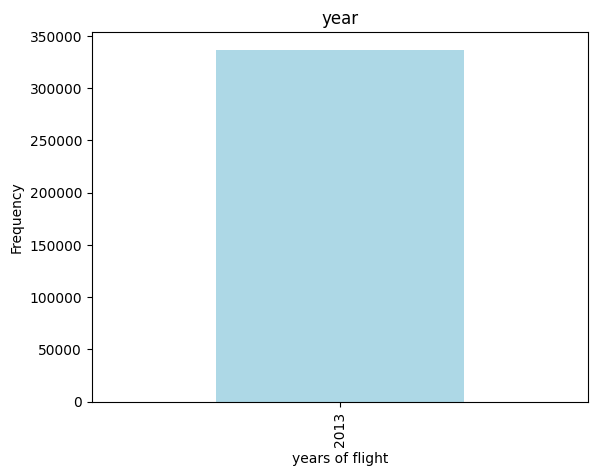

In [132]:
plot_bar(data['year'], 'year', 'years of flight')

In [133]:
moments(data["year"])

mean:  2013.0
median:  2013.0
skew:  0
kurtosis:  0


**Month**  

histogram display number of flights in each month

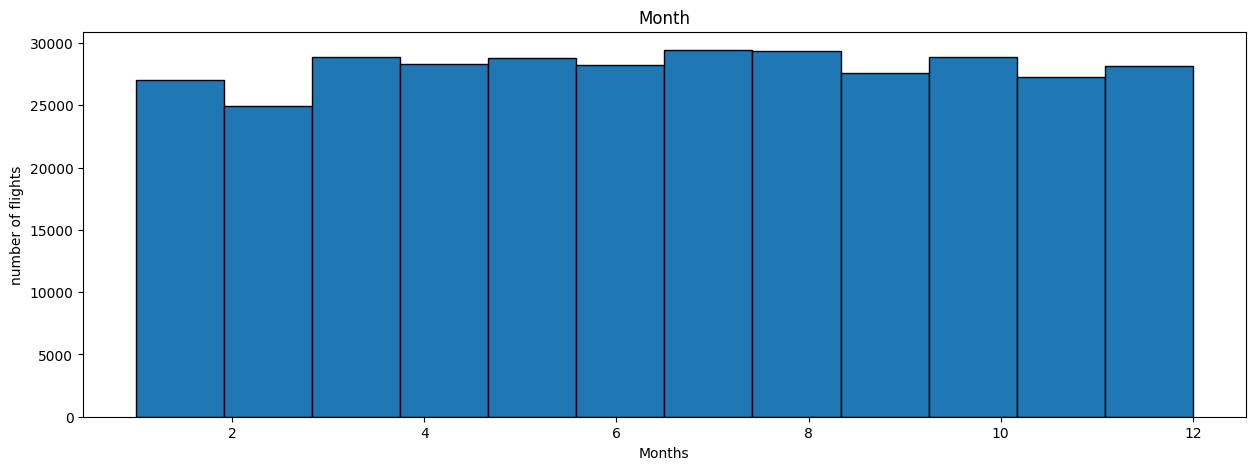

In [134]:
plt.figure(figsize=(15,5))
histogram(data['month'], bins=12, title='Month', x_label="Months", y_label="number of flights")

**day**  

we have flight reduction at the end of the month

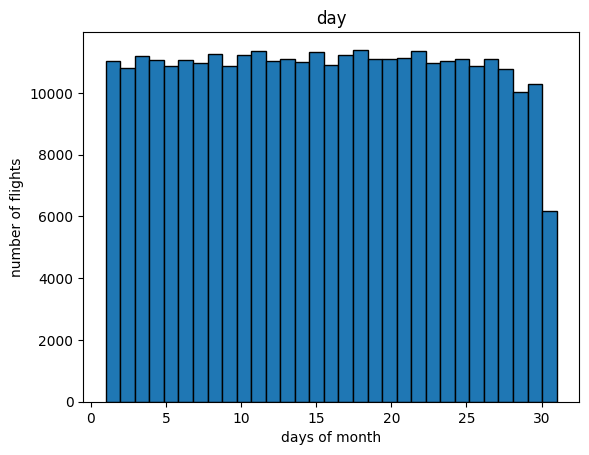

In [137]:
histogram(data['day'], bins=31, title='day', x_label="days of month", y_label="number of flights")

**dep_time**  

Flight departures have two main peaks: mornings (around 6:00) and evenings (around 6:00), with fewer flights late at night (11:00 pm to 4:00 am).  

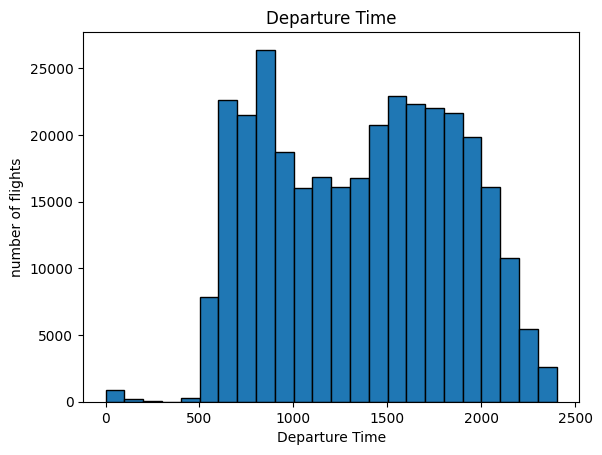

In [138]:
histogram(data['dep_time'], bins=24, title='Departure Time', x_label="Departure Time", y_label="number of flights")

In [142]:
moments(data["dep_time"])

mean:  1349.1099473093045
median:  1401.0
skew:  -0.024743453027545905
kurtosis:  -1.0883199913974155


**sched_dep_time**  

similar to the departure time histogram

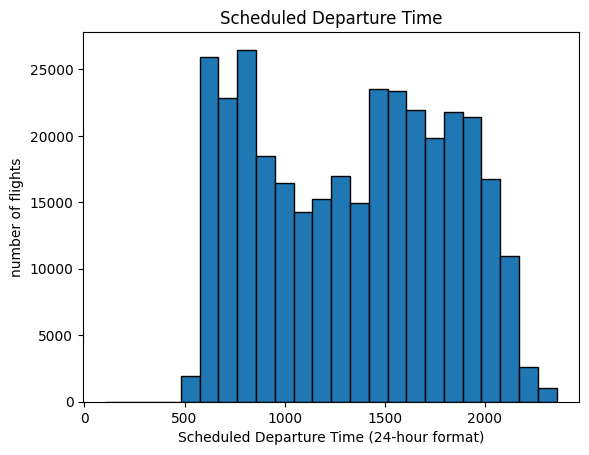

In [140]:
histogram(data['sched_dep_time'], bins=24, title='Scheduled Departure Time', x_label="Scheduled Departure Time (24-hour format)", y_label="number of flights")


In [143]:
moments(data["sched_dep_time"])

mean:  1344.2548400123524
median:  1359.0
skew:  -0.005858082889925038
kurtosis:  -1.1979030992530513


**dep_delay**  

The histogram shows flights mostly on-time (peak at zero), but many are delayed (long tail to the right).

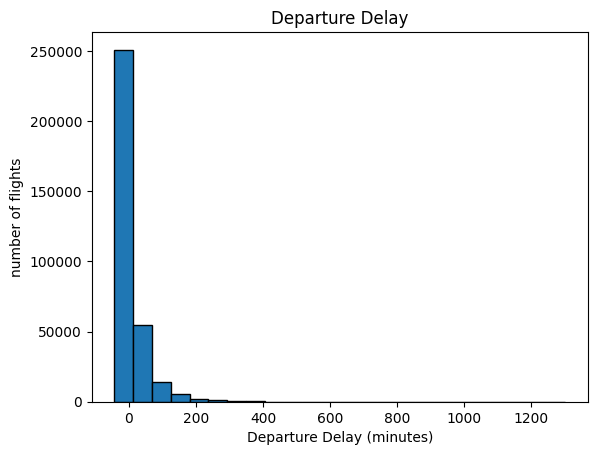

In [144]:
histogram(data['dep_delay'], bins=24, title='Departure Delay', x_label="Departure Delay (minutes)", y_label="number of flights")


In [147]:
moments(data["dep_delay"])

mean:  12.639070257304708
median:  -2.0
skew:  4.802540511080034
kurtosis:  43.95011602901041


**arr_time**  

Similar to departures, arrivals also peak in the mornings and evenings

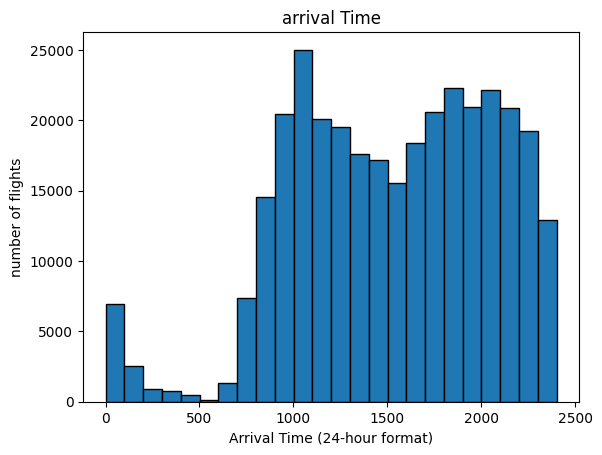

In [149]:
histogram(data['arr_time'], bins=24, title='arrival Time', x_label="Arrival Time (24-hour format)", y_label="number of flights")

In [148]:
moments(data["arr_time"])

mean:  1502.0549985825894
median:  1535.0
skew:  -0.4678190641515941
kurtosis:  -0.19263438394923016


**sched_arr_time**  

similar to the arrival time

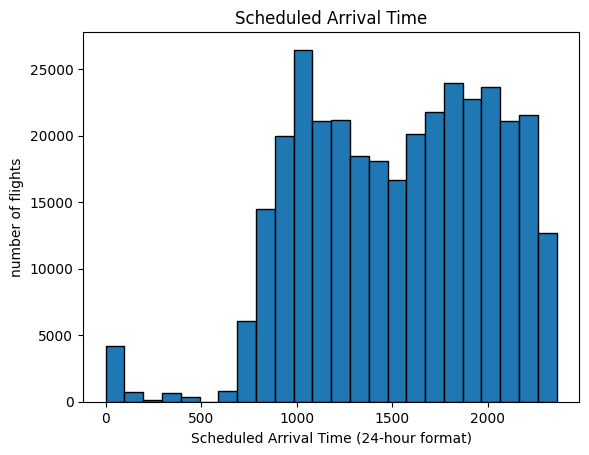

In [150]:
histogram(data['sched_arr_time'], bins=24, title='Scheduled Arrival Time', x_label="Scheduled Arrival Time (24-hour format)", y_label="number of flights")


In [151]:
moments(data["sched_arr_time"])

mean:  1536.380220086942
median:  1556.0
skew:  -0.35313806953431953
kurtosis:  -0.3822477902236434


**arr_delay**  

Most flights arrive on time (peak around zero), but there are also a lot of delayed flights (long tail to the right).

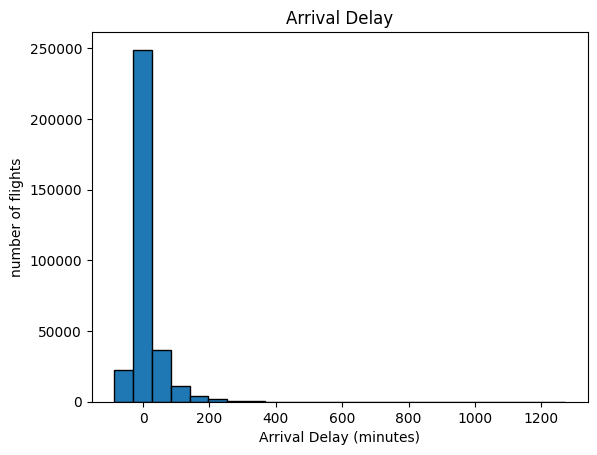

In [152]:
histogram(data['arr_delay'], bins=24, title='Arrival Delay', x_label="Arrival Delay (minutes)", y_label="number of flights")

In [153]:
moments(data["arr_delay"])

mean:  6.89537675731489
median:  -5.0
skew:  3.7168174804571863
kurtosis:  29.233043998766775


**carrier**  

UA, B6, EV, and DL are the top airlines based on flight count (highest bars in the bar plot).

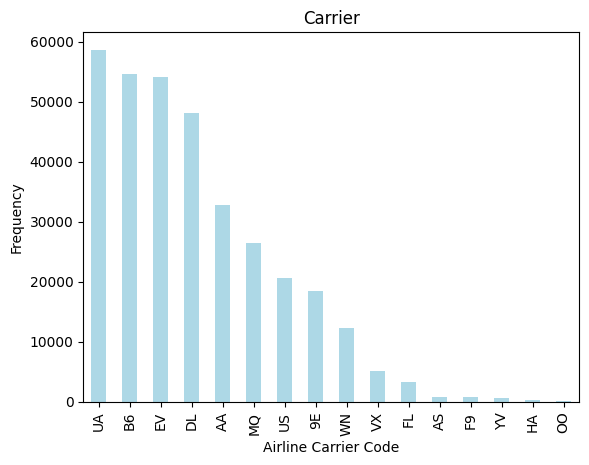

In [154]:
plot_bar(data['carrier'], 'Carrier', 'Airline Carrier Code')

**origin**  

EWR has the most departing flights

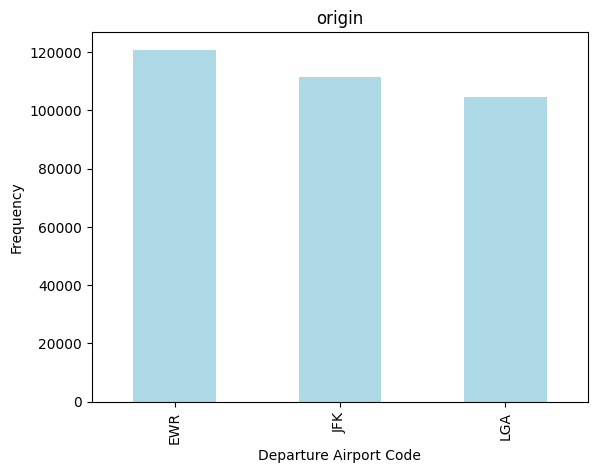

In [155]:
plot_bar(data['origin'], 'origin', 'Departure Airport Code')


**dest**  

ORD, ATL, and LAX are the top destinations based on flight count 

<Axes: xlabel='dest'>

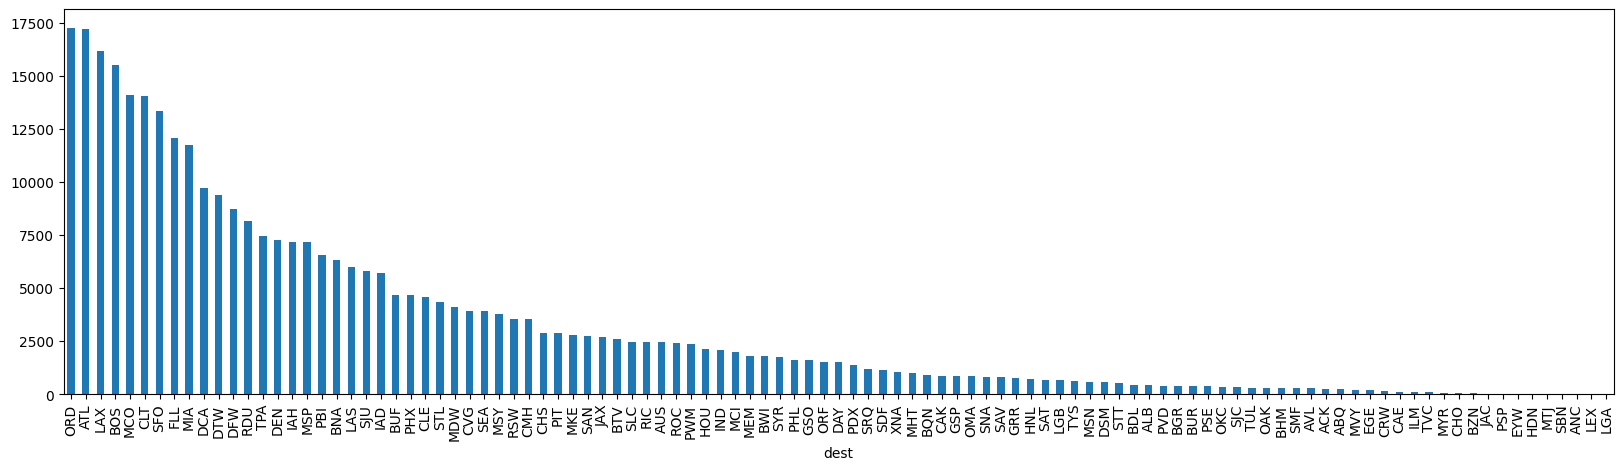

In [166]:
plt.figure(figsize=(20,5))
data['dest'].value_counts().plot(kind='bar')

**air_time**  

The histogram peaks between 500-1000 miles, though some flights travel much farther

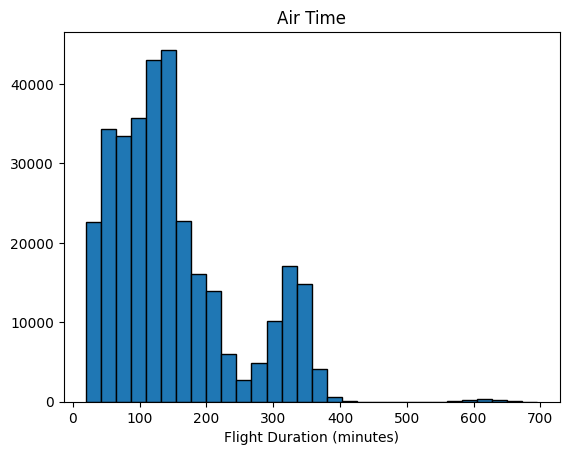

In [167]:
histogram(data['air_time'], bins=30, title='Air Time', x_label='Flight Duration (minutes)')

In [169]:
moments(data['air_time'])

mean:  150.68646019807787
median:  129.0
skew:  1.0707051855942948
kurtosis:  0.8630769907667859


**hour**

similar to departures, scheduled departures also peak in the mornings and evenings

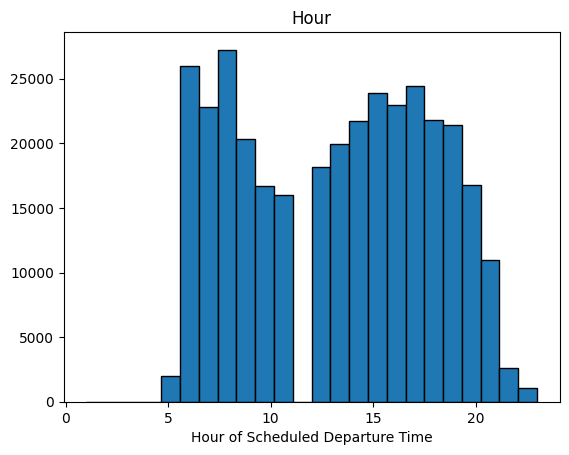

In [168]:
histogram(data['hour'], bins=24, title='Hour', x_label='Hour of Scheduled Departure Time')

In [171]:
moments(data['hour'])

mean:  13.180247404803193
median:  13.0
skew:  -0.000542651781721953
kurtosis:  -1.2064160892898406


**minute**  

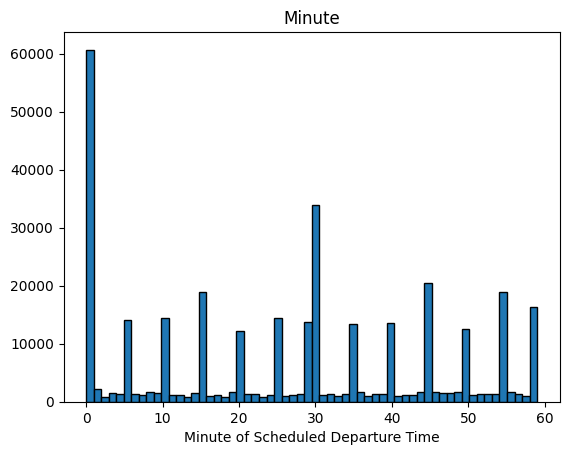

In [173]:
histogram(data['minute'], bins=60, title='Minute', x_label='Minute of Scheduled Departure Time')

**name**  

most flights:  United Air Lines Inc., JetBlue Airways and ExpressJet Airlines Inc.

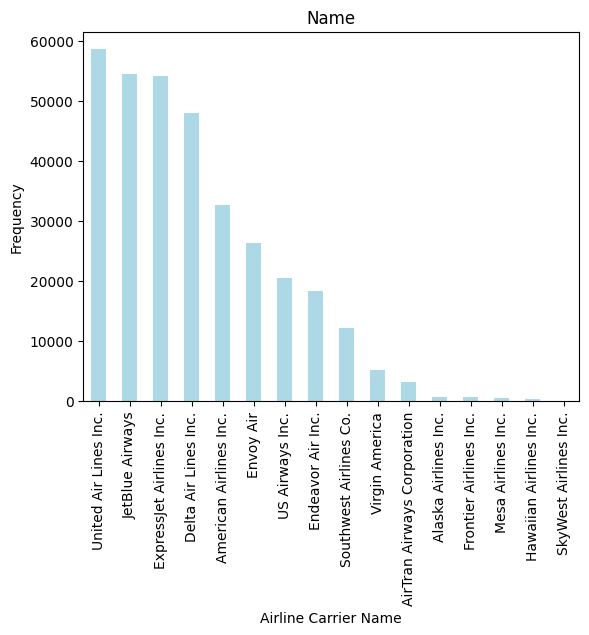

In [175]:
plot_bar(data['name'], 'Name', 'Airline Carrier Name')